# 1. Mount Google Drive and Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/Tumor Detection'

# 2. Visualize Dataset Images


📁 Showing 12 images from TRAIN set:


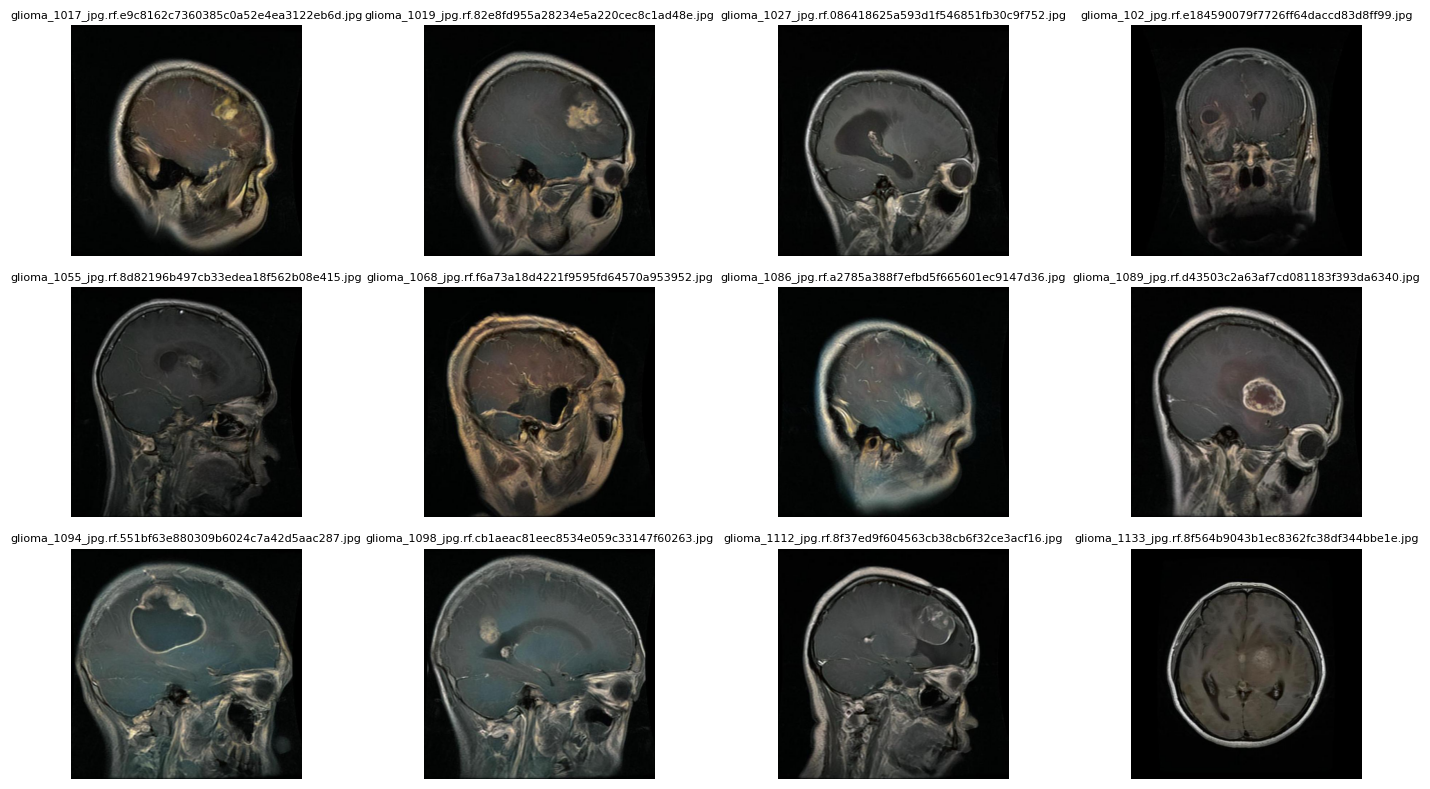


📁 Showing 12 images from TEST set:


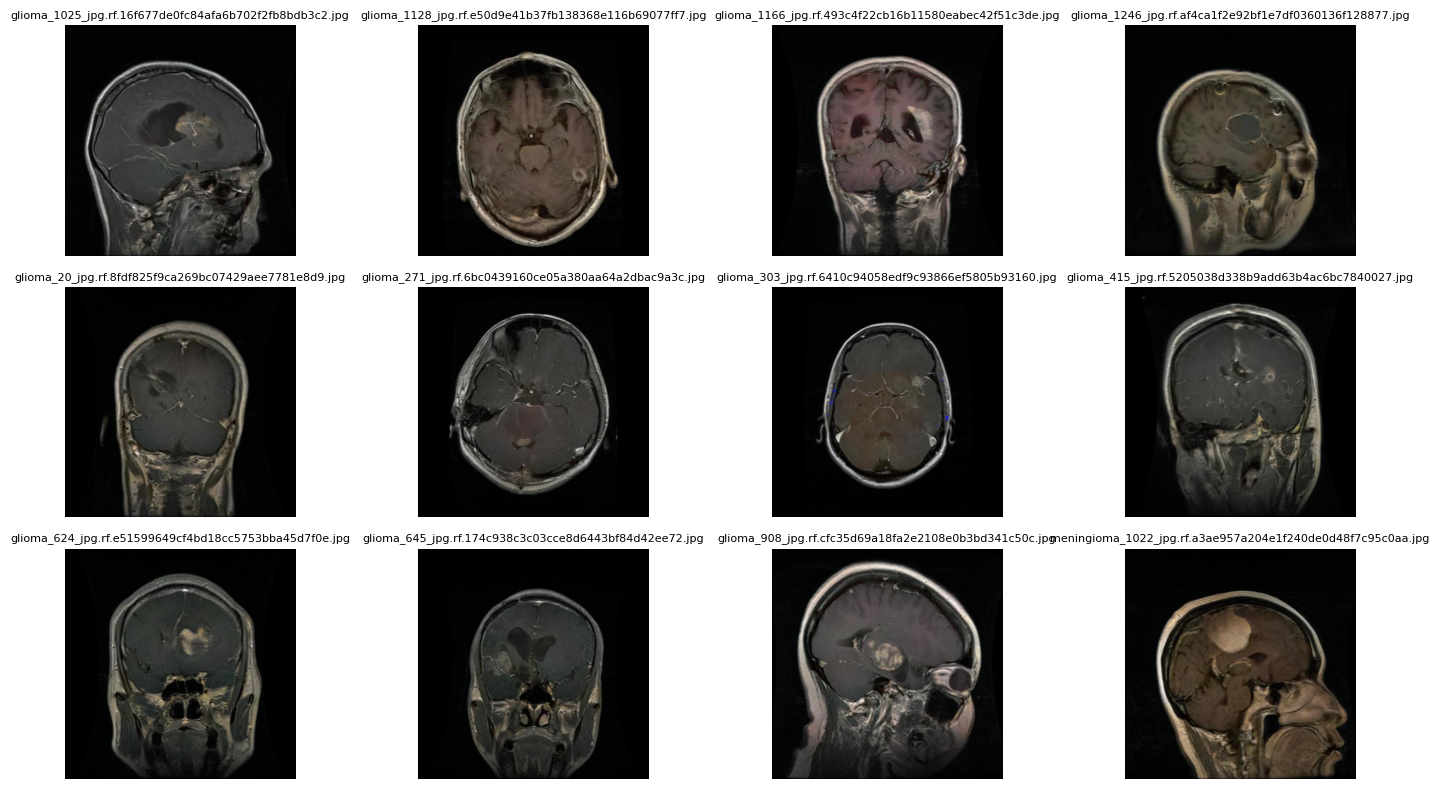


📁 Showing 12 images from VALID set:


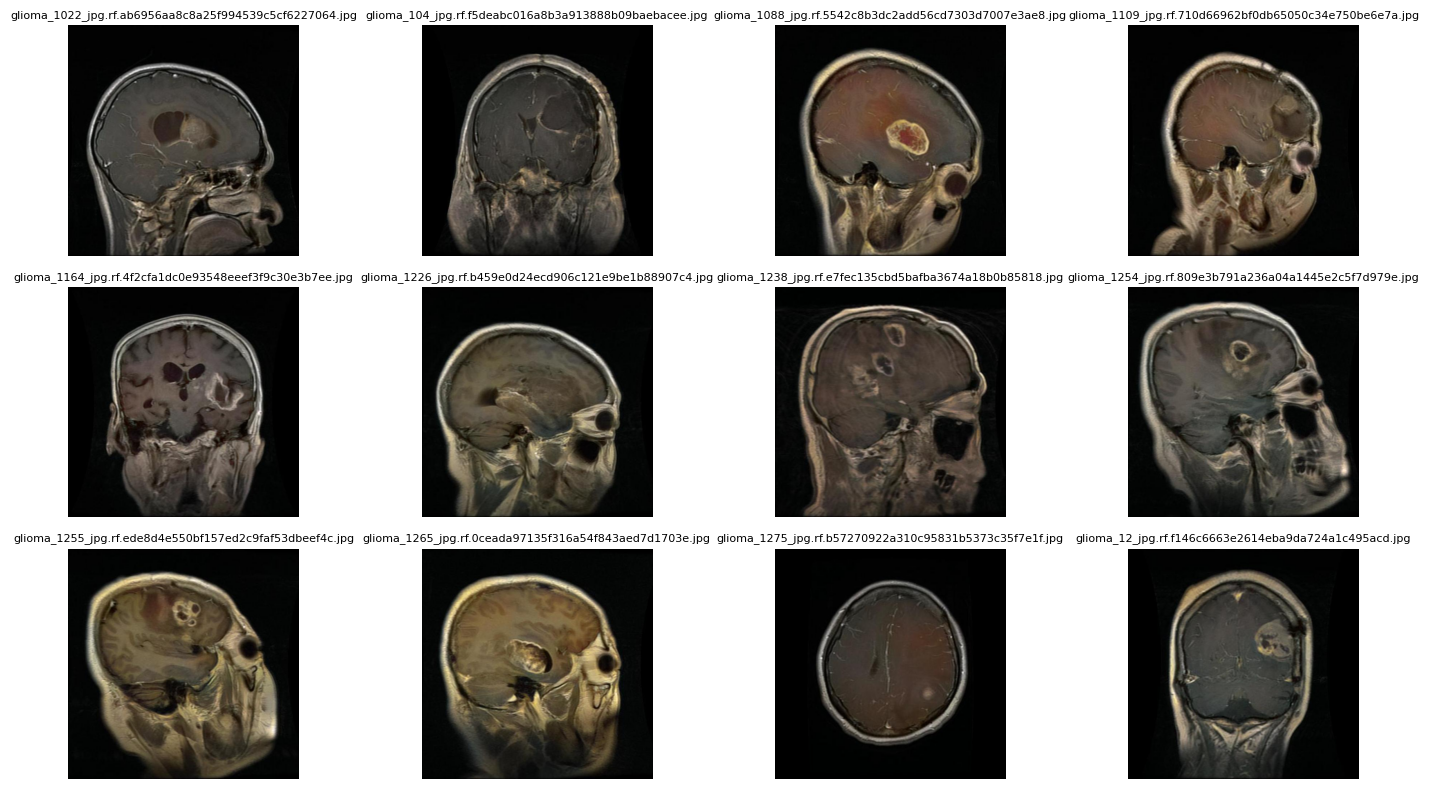

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

# Base path
base_path = '/content/drive/MyDrive/Tumor Detection'

# Dataset folders
splits = ['train', 'test', 'valid']

for split in splits:
    img_dir = os.path.join(base_path, split, 'images')
    img_files = sorted(os.listdir(img_dir))[:12]  # Take first 12 images

    print(f"\n📁 Showing 12 images from {split.upper()} set:")

    plt.figure(figsize=(15, 8))
    for i, file in enumerate(img_files):
        img_path = os.path.join(img_dir, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(file, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# 3. Count Images per Split

In [3]:

# Count images in each split
for split in splits:
    img_dir = os.path.join(base_path, split, 'images')
    num_images = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    print(f"📁 {split.upper()} folder has {num_images} images.")


📁 TRAIN folder has 1370 images.
📁 TEST folder has 191 images.
📁 VALID folder has 395 images.


# 4. Load Class Info from data.yaml

In [4]:
import yaml

yaml_path = '/content/drive/MyDrive/Tumor Detection/data.yaml'

with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

print(f"Number of classes: {data['nc']}")
print("Class names:", data['names'])


Number of classes: 5
Class names: ['NO_tumor', 'glioma', 'meningioma', 'pituitary', 'space-occupying lesion-']


# 5. Install and Train YOLOv11

In [6]:
!pip install ultralytics --upgrade



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO

In [4]:
model = YOLO('yolo11n.pt')  # Replace with yolov11-seg.pt when available

model.train(
    data='/content/drive/MyDrive/Tumor Detection/data.yaml',
    epochs=20,
    imgsz=640,
    batch=4,
    device='cuda'


)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Tumor Detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

train: Scanning /content/drive/MyDrive/Tumor Detection/train/labels.cache... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Tumor Detection/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.6±0.4 ms, read: 2.9±1.1 MB/s, size: 29.4 KB)


val: Scanning /content/drive/MyDrive/Tumor Detection/valid/labels.cache... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20     0.713G      1.015      3.049      1.348          6        640: 100%|██████████| 343/343 [15:23<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.27it/s]

                   all        395        415      0.636      0.395      0.435      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.844G     0.9713      2.064      1.305          5        640: 100%|██████████| 343/343 [00:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.77it/s]


                   all        395        415      0.788      0.446      0.424      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.857G       1.04      1.882      1.359          2        640: 100%|██████████| 343/343 [00:49<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.96it/s]


                   all        395        415      0.788      0.527      0.566      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.857G      1.028      1.605       1.34          6        640: 100%|██████████| 343/343 [00:48<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.83it/s]


                   all        395        415      0.781      0.476      0.518      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.857G     0.9956      1.475      1.313          3        640: 100%|██████████| 343/343 [00:48<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.97it/s]


                   all        395        415      0.724      0.542      0.541      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.859G     0.9922       1.39      1.313          4        640: 100%|██████████| 343/343 [00:47<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.36it/s]

                   all        395        415      0.739      0.584      0.573      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.859G     0.9358      1.222      1.277          4        640: 100%|██████████| 343/343 [00:47<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.46it/s]

                   all        395        415      0.791      0.574      0.593      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.859G     0.9038      1.162      1.269          3        640: 100%|██████████| 343/343 [00:46<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.46it/s]

                   all        395        415      0.801      0.572      0.605      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.873G     0.8617      1.087      1.214          2        640: 100%|██████████| 343/343 [00:47<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.05it/s]

                   all        395        415      0.588      0.594      0.639      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.873G     0.8435      1.069      1.224          1        640: 100%|██████████| 343/343 [00:48<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.05it/s]

                   all        395        415      0.619      0.574      0.621      0.481


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.887G     0.7479     0.9925      1.185          2        640: 100%|██████████| 343/343 [00:48<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.99it/s]

                   all        395        415      0.606      0.616      0.643      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.887G     0.7101     0.8638      1.149          2        640: 100%|██████████| 343/343 [00:48<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.88it/s]

                   all        395        415        0.8      0.611      0.621      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.887G      0.693      0.833      1.141          2        640: 100%|██████████| 343/343 [00:47<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.92it/s]

                   all        395        415      0.793      0.624      0.622      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       0.9G     0.6709      0.792       1.12          3        640: 100%|██████████| 343/343 [00:46<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.25it/s]

                   all        395        415       0.87      0.594       0.64      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.902G     0.6396       0.74      1.092          3        640: 100%|██████████| 343/343 [00:46<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.27it/s]

                   all        395        415       0.87      0.584      0.655      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.916G     0.6321     0.6913      1.099          2        640: 100%|██████████| 343/343 [00:46<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.75it/s]

                   all        395        415      0.853      0.605      0.658      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.916G      0.617     0.6799      1.079          2        640: 100%|██████████| 343/343 [00:46<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.03it/s]

                   all        395        415      0.849      0.631      0.657      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.916G     0.5927     0.6456      1.065          3        640: 100%|██████████| 343/343 [00:48<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.96it/s]

                   all        395        415      0.869      0.624      0.664      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.916G     0.5773      0.619      1.054          2        640: 100%|██████████| 343/343 [00:48<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 11.07it/s]

                   all        395        415       0.86      0.619      0.657      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.916G     0.5516     0.5776      1.039          2        640: 100%|██████████| 343/343 [00:47<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.78it/s]

                   all        395        415      0.881      0.599      0.659      0.539



20 epochs completed in 0.540 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:04<00:00, 10.59it/s]


                   all        395        415      0.881        0.6      0.659      0.539
              NO_tumor        115        116      0.932      0.931      0.971       0.79
                glioma         30         36      0.744      0.528      0.589      0.429
            meningioma        144        148      0.935      0.877      0.935      0.818
             pituitary        106        111      0.795      0.665      0.781       0.64
space-occupying lesion-          1          4          1          0     0.0207     0.0177
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2eaf92f490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

# 6. Visualize YOLO Training Results

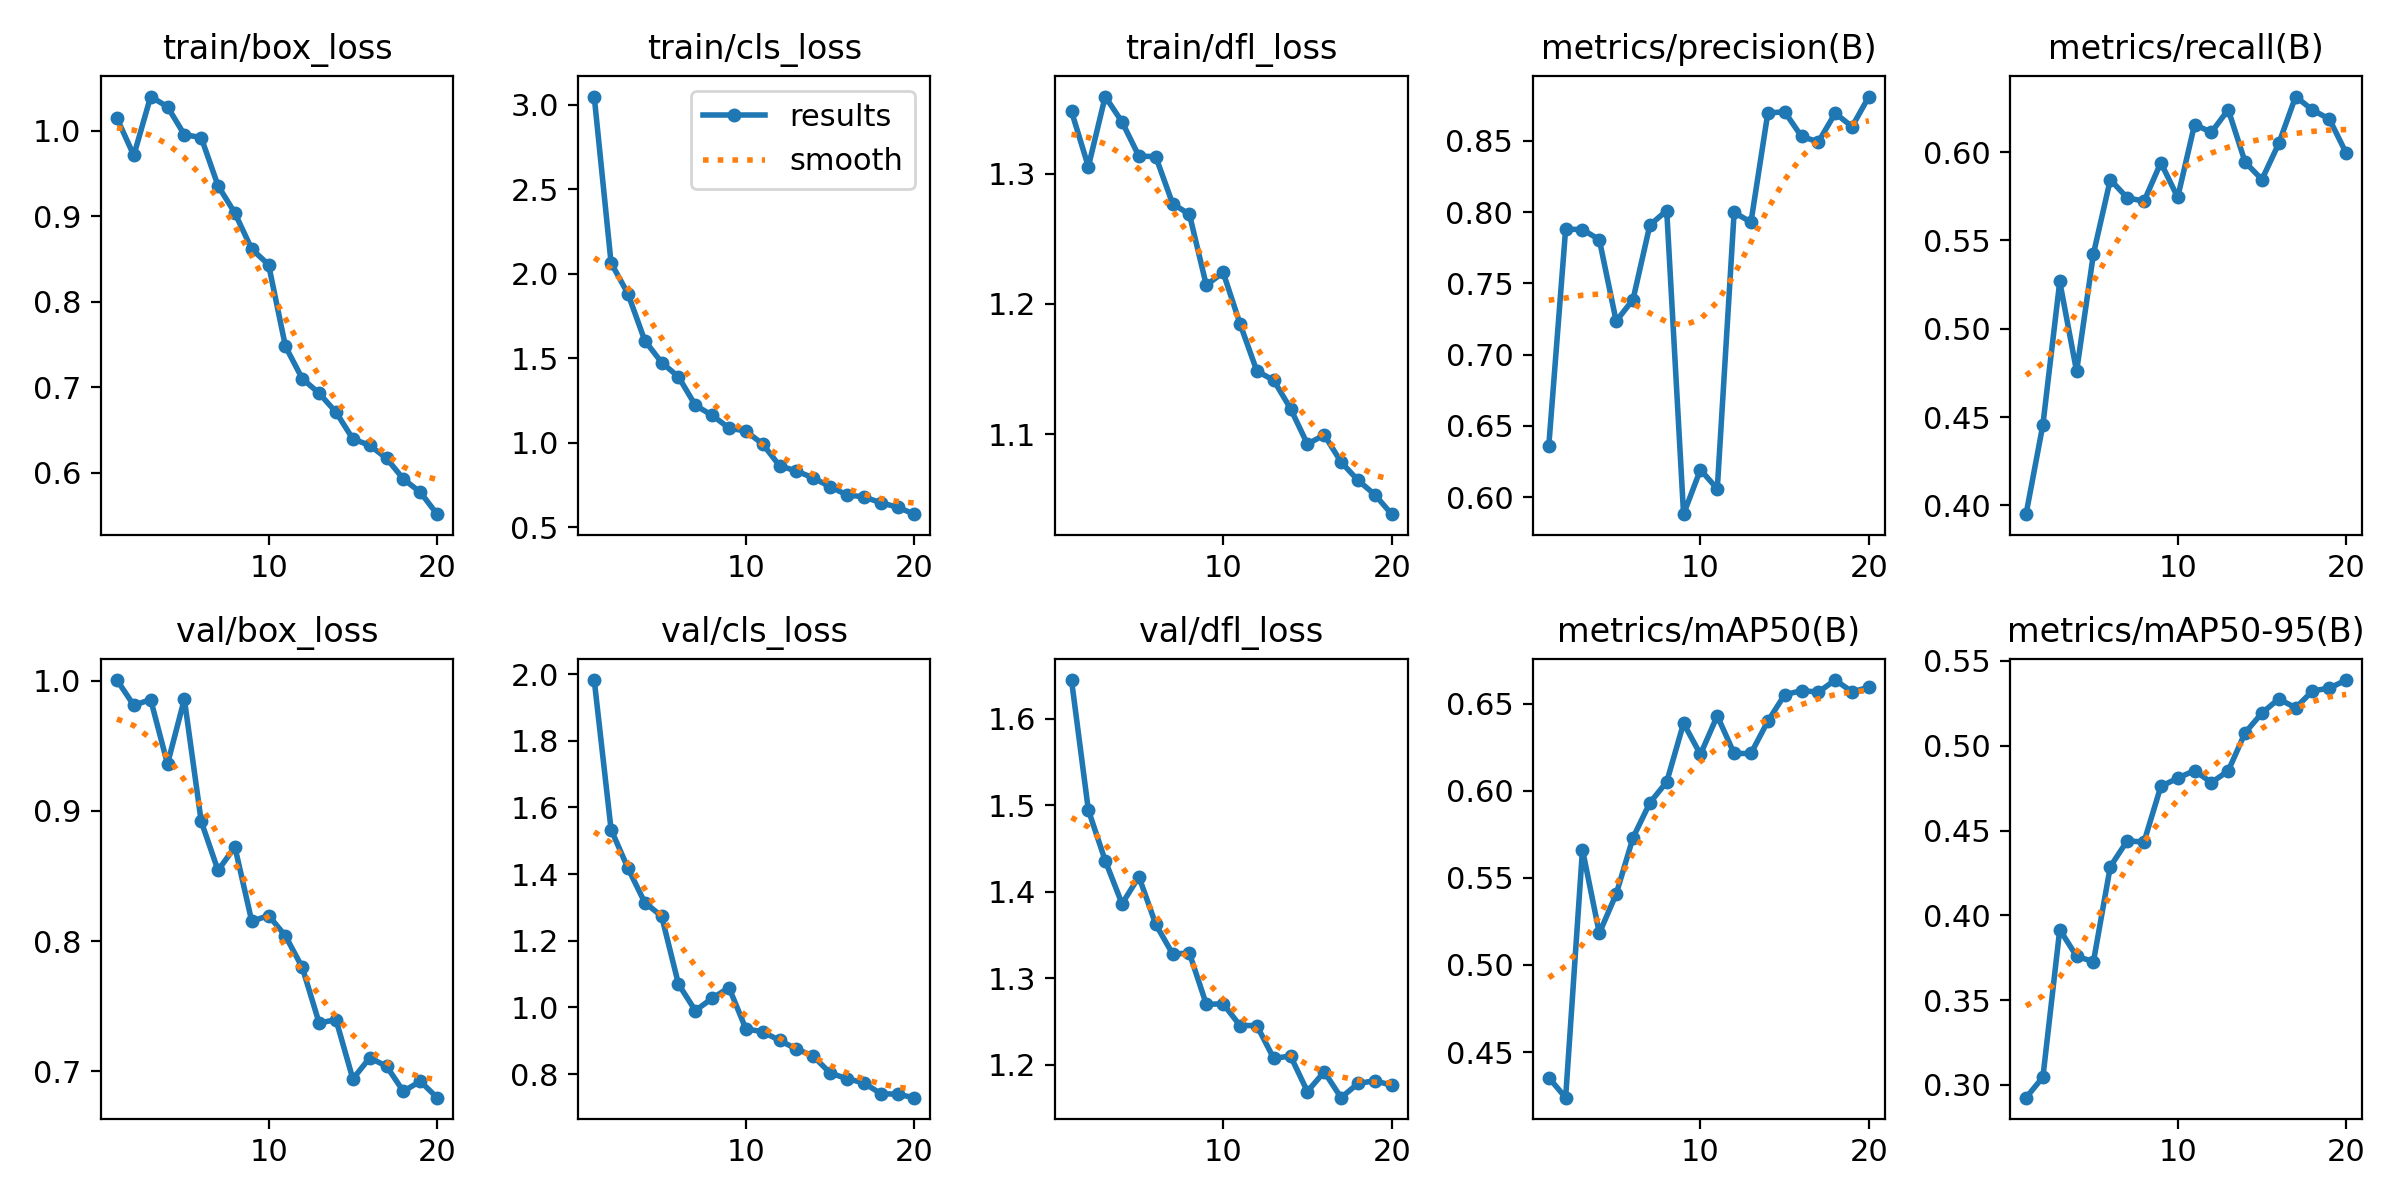

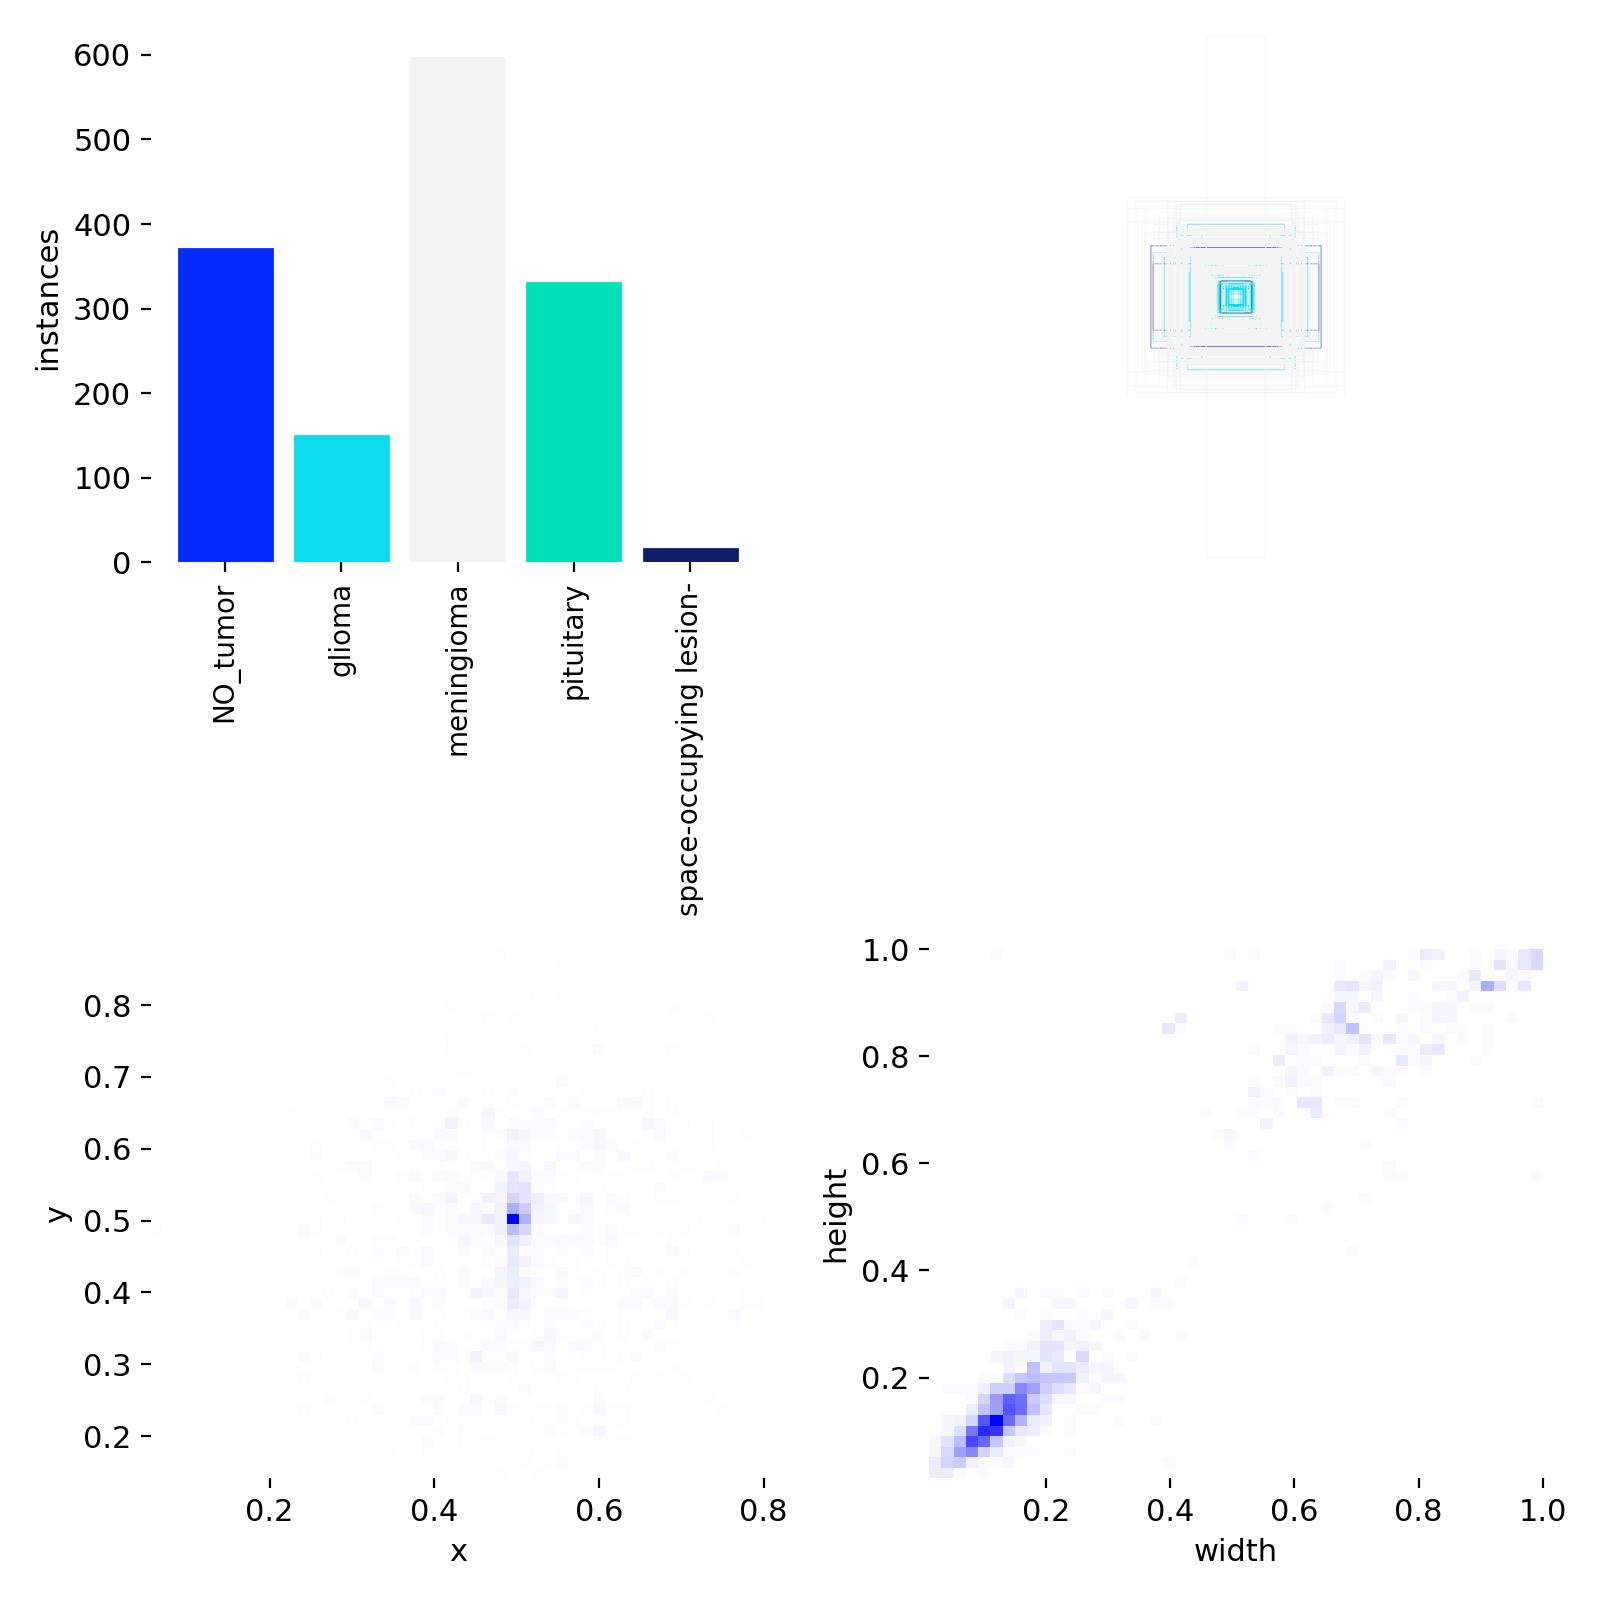

In [5]:
from IPython.display import Image, display

# Show training result image (loss curves, metrics, etc.)
display(Image(filename='runs/detect/train3/results.png'))

# Show label distribution
display(Image(filename='runs/detect/train3/labels.jpg'))


# 7. Run YOLO Inference on Test Images

In [6]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('runs/detect/train3/weights/best.pt')

# Inference on a folder or single image
model.predict(source='/content/drive/MyDrive/Tumor Detection/test/images', save=True, conf=0.25)



image 1/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_1025_jpg.rf.16f677de0fc84afa6b702f2fb8bdb3c2.jpg: 640x640 2 gliomas, 21.7ms
image 2/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_1128_jpg.rf.e50d9e41b37fb138368e116b69077ff7.jpg: 640x640 1 glioma, 1 pituitary, 76.9ms
image 3/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_1166_jpg.rf.493c4f22cb16b11580eabec42f51c3de.jpg: 640x640 1 meningioma, 10.8ms
image 4/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_1246_jpg.rf.af4ca1f2e92bf1e7df0360136f128877.jpg: 640x640 3 gliomas, 9.6ms
image 5/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_20_jpg.rf.8fdf825f9ca269bc07429aee7781e8d9.jpg: 640x640 8 gliomas, 9.0ms
image 6/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_271_jpg.rf.6bc0439160ce05a380aa64a2dbac9a3c.jpg: 640x640 1 glioma, 9.5ms
image 7/191 /content/drive/MyDrive/Tumor Detection/test/images/glioma_303_jpg.rf.6410c94058edf9c93866ef5805b93160.j

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'NO_tumor', 1: 'glioma', 2: 'meningioma', 3: 'pituitary', 4: 'space-occupying lesion-'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],

# 8. Display YOLO Predictions (15 Images)

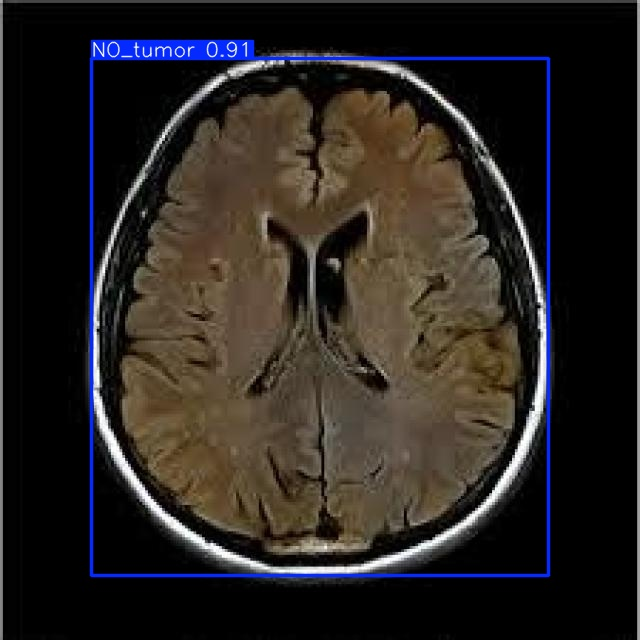

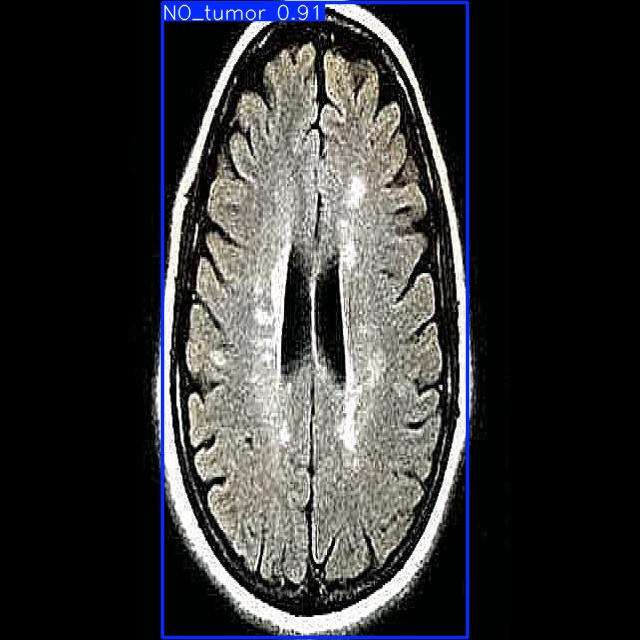

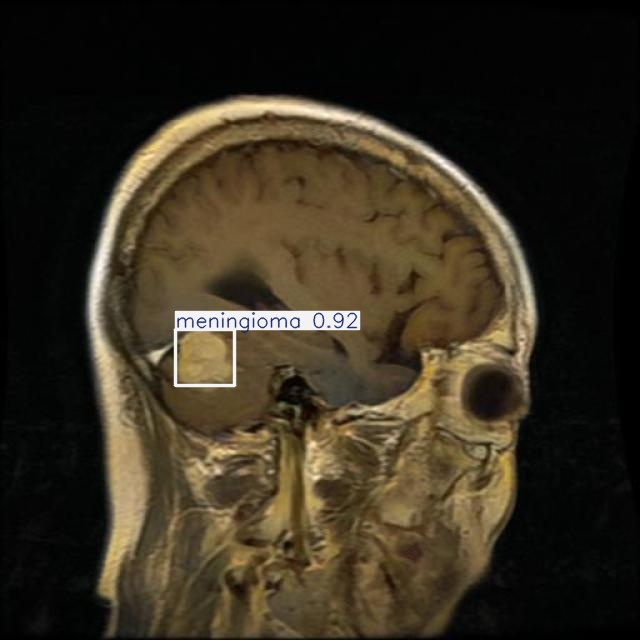

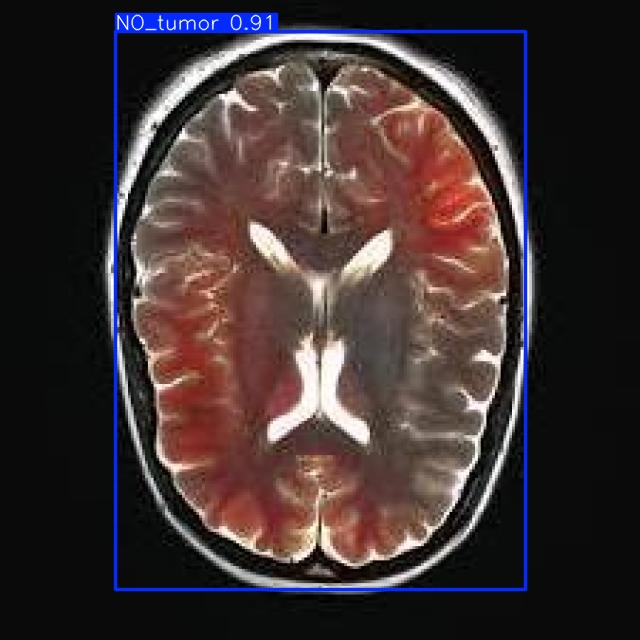

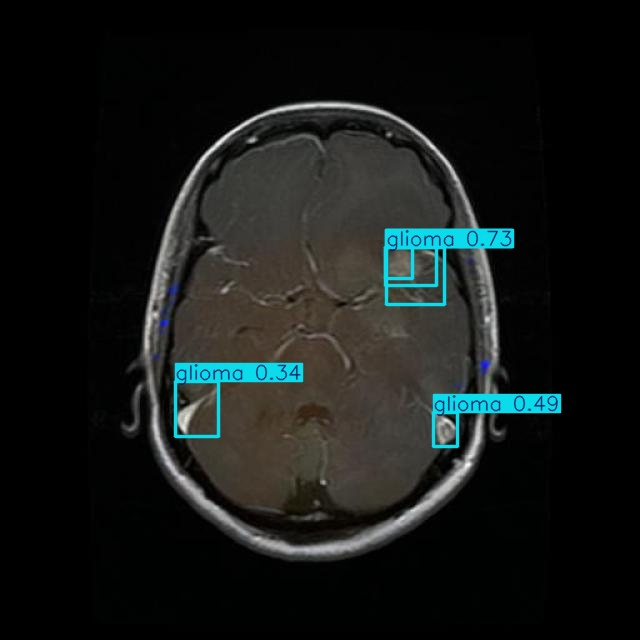

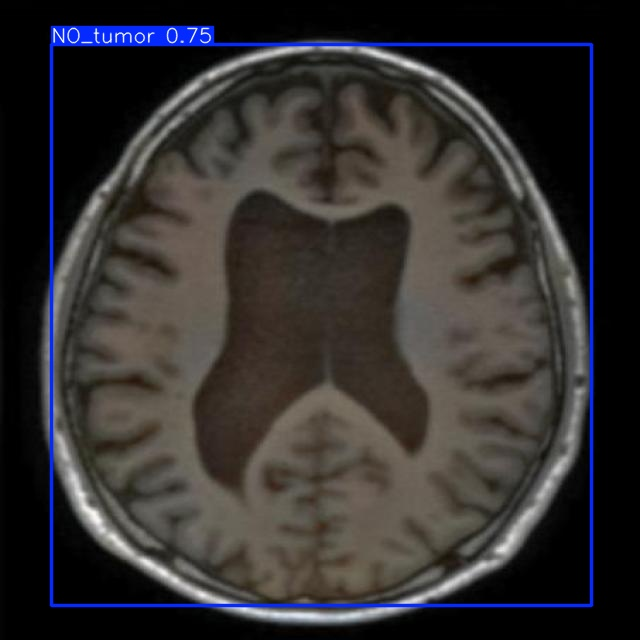

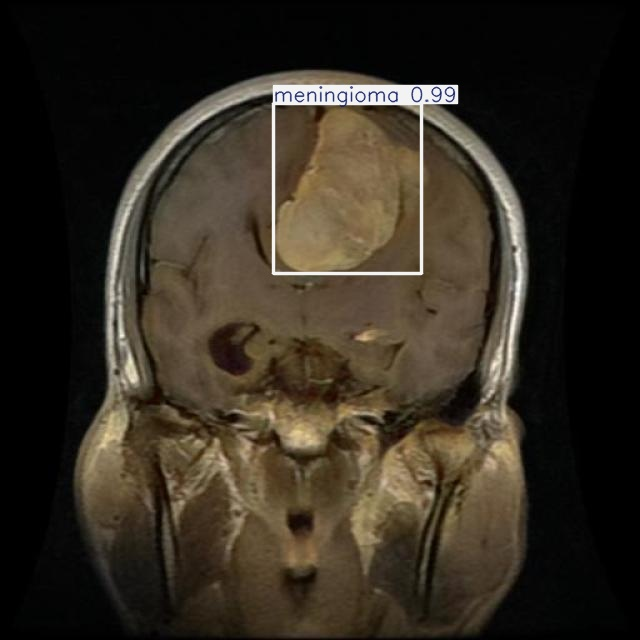

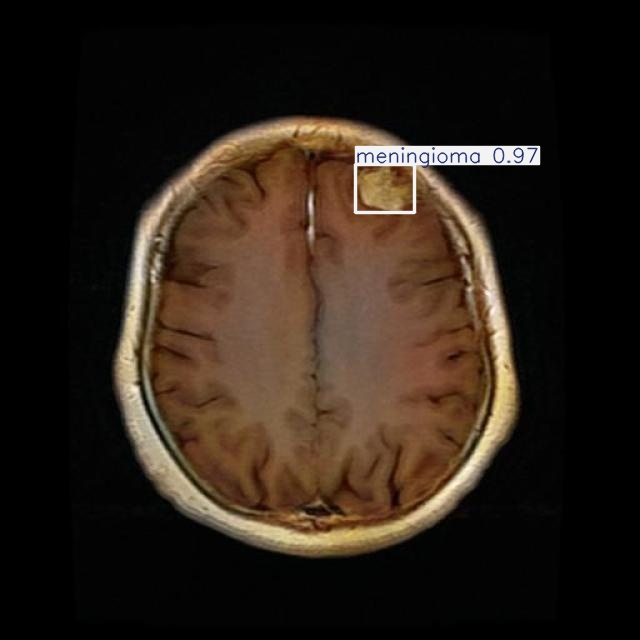

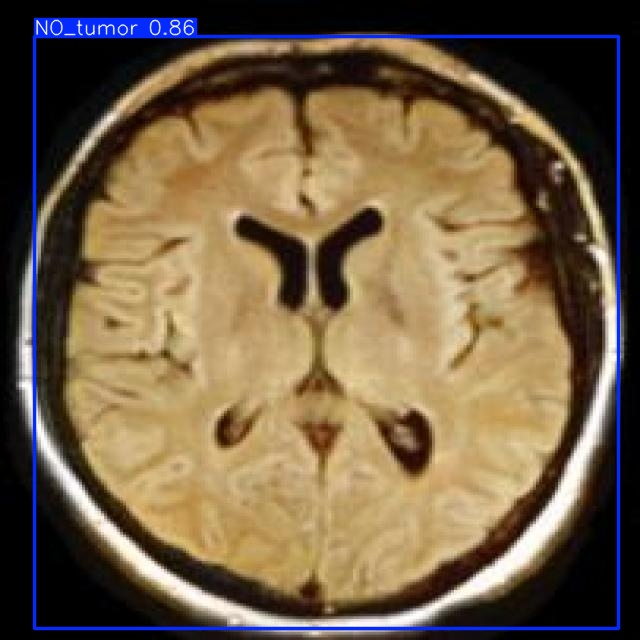

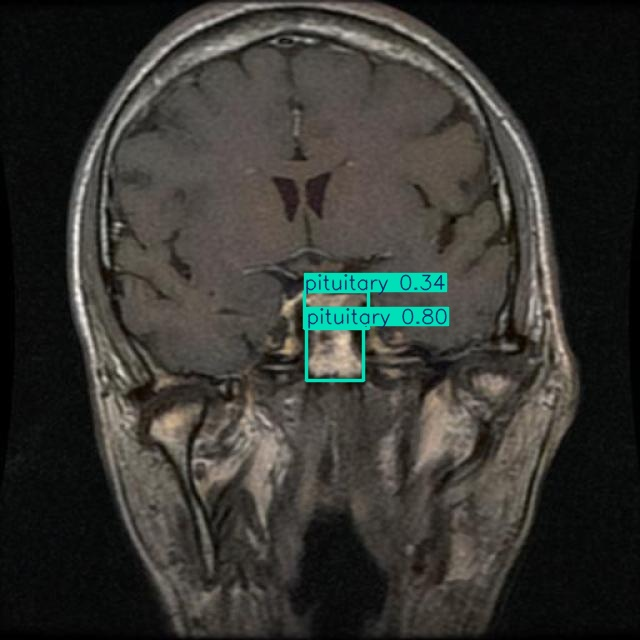

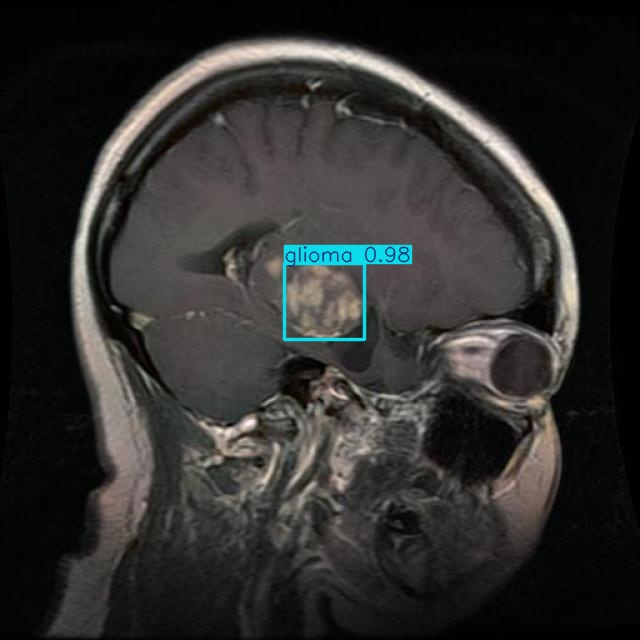

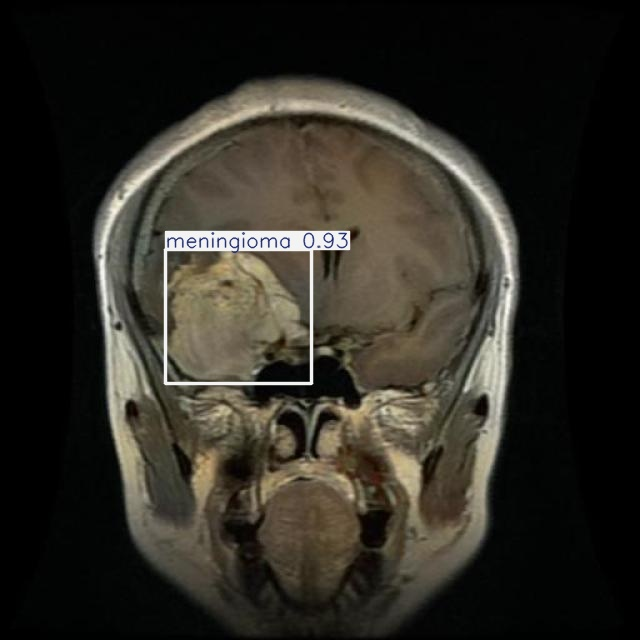

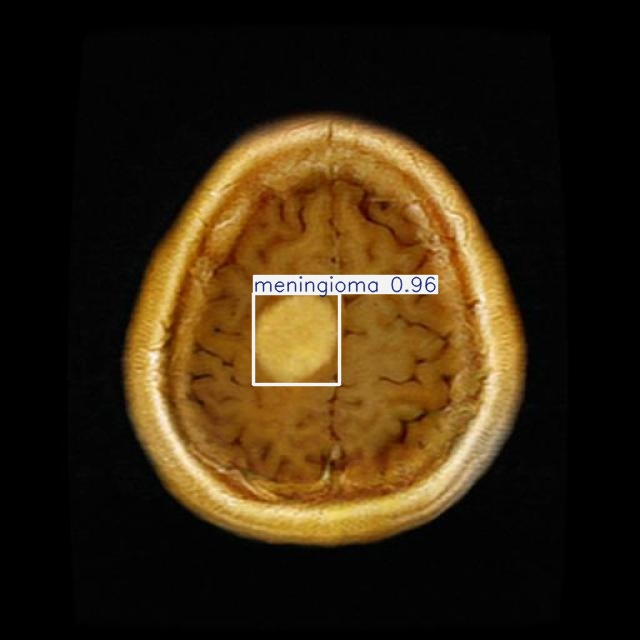

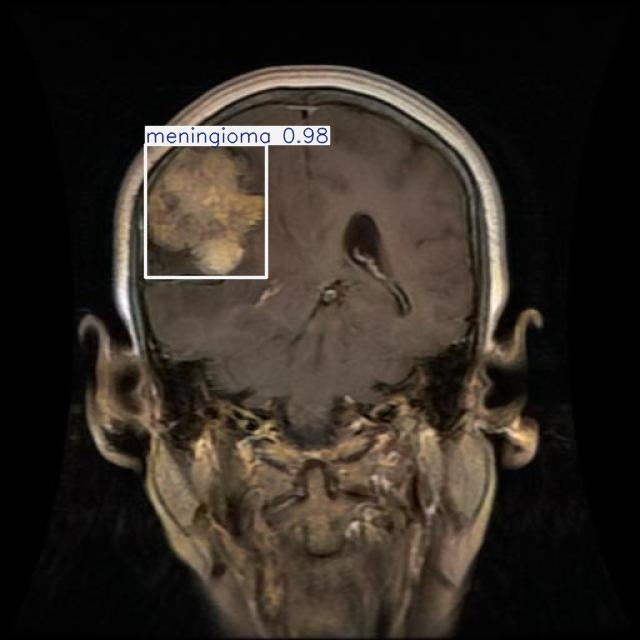

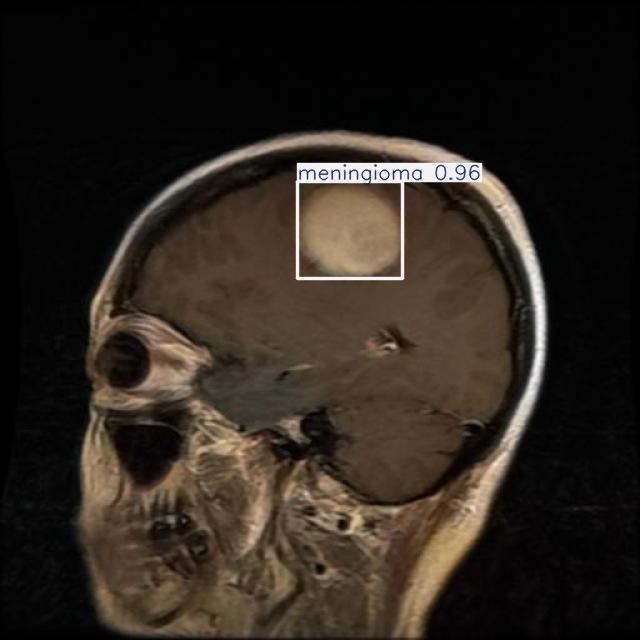

In [8]:
import os
from IPython.display import Image, display

predict_path = 'runs/detect/predict'
shown = 0  # counter
limit = 15  # show only 15 images

for image_name in os.listdir(predict_path):
    if image_name.endswith('.jpg'):
        display(Image(filename=os.path.join(predict_path, image_name)))
        shown += 1
        if shown >= limit:
            break



# 9. Save YOLO Bounding Boxes + Labels to JSON

In [32]:
from ultralytics import YOLO
import os
from glob import glob
import cv2
import json
import yaml

# --- Load class names from YAML ---
yaml_path = '/content/drive/MyDrive/Tumor Detection/data.yaml'
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)
class_names = data['names']  # e.g., ['NO_tumor', 'glioma', 'meningioma', 'pituitary', 'space-occupying lesion-']

# --- Load the trained YOLOv11 model ---
model = YOLO("runs/detect/train3/weights/best.pt")

# --- Path to test or validation images ---
test_img_dir = "/content/drive/MyDrive/Tumor Detection/valid/images"
image_paths = glob(os.path.join(test_img_dir, "*.jpg"))

# --- Run inference ---
results = model(image_paths)

# --- Extract predictions ---
all_boxes = []

for i, result in enumerate(results):
    img_path = image_paths[i]
    image_name = os.path.basename(img_path)

    for j in range(len(result.boxes)):
        box = result.boxes.xyxy[j].cpu().numpy()  # (x1, y1, x2, y2)
        conf = float(result.boxes.conf[j].cpu().numpy())  # Confidence score
        class_id = int(result.boxes.cls[j].cpu().numpy())  # Class ID
        label = class_names[class_id]  # Get class label name

        x1, y1, x2, y2 = box[:4]
        all_boxes.append({
            "image": image_name,
            "bbox": [float(x1), float(y1), float(x2), float(y2)],
            "confidence": conf,
            "label": label
        })

# --- Save to JSON file ---
output_json_path = "/content/yolo_bboxes_with_labels.json"
with open(output_json_path, "w") as f:
    json.dump(all_boxes, f, indent=4)

print(f"✅ Saved bounding boxes with labels to: {output_json_path}")




0: 640x640 1 glioma, 3.7ms
1: 640x640 2 meningiomas, 3.7ms
2: 640x640 1 glioma, 1 meningioma, 3.7ms
3: 640x640 4 gliomas, 3.7ms
4: 640x640 1 meningioma, 3.7ms
5: 640x640 1 meningioma, 3.7ms
6: 640x640 1 meningioma, 3.7ms
7: 640x640 2 gliomas, 3.7ms
8: 640x640 1 meningioma, 3.7ms
9: 640x640 2 gliomas, 3.7ms
10: 640x640 1 meningioma, 3.7ms
11: 640x640 1 meningioma, 3.7ms
12: 640x640 1 glioma, 3.7ms
13: 640x640 1 meningioma, 3.7ms
14: 640x640 2 meningiomas, 3.7ms
15: 640x640 1 meningioma, 3.7ms
16: 640x640 1 glioma, 3.7ms
17: 640x640 1 glioma, 3.7ms
18: 640x640 1 meningioma, 3.7ms
19: 640x640 1 meningioma, 3.7ms
20: 640x640 1 meningioma, 3.7ms
21: 640x640 (no detections), 3.7ms
22: 640x640 1 meningioma, 3.7ms
23: 640x640 1 meningioma, 3.7ms
24: 640x640 1 meningioma, 3.7ms
25: 640x640 2 gliomas, 3.7ms
26: 640x640 (no detections), 3.7ms
27: 640x640 1 meningioma, 3.7ms
28: 640x640 3 gliomas, 3.7ms
29: 640x640 1 meningioma, 3.7ms
30: 640x640 1 meningioma, 3.7ms
31: 640x640 1 meningioma, 3.7m

# 10. Install SAM2 Dependencies and Run SAM2 Segmentation (Simple Mask Overlay)

In [23]:
# Install required dependencies for SAM2
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib

# Imports
import torch
import numpy as np
import cv2
import json
import os
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt
from PIL import Image

# Load SAM2 model
sam_checkpoint = "/content/sam_b.pt"  # You can also use sam_vit_h.pth or sam_vit_l.pth if you have those
model_type = "vit_b"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to("cuda")  # Or use "cpu" if you're not on GPU
predictor = SamPredictor(sam)


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-c8pb_fsf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-c8pb_fsf
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [24]:
# Load YOLO bounding boxes from JSON
json_path = "/content/yolo_bboxes_for_sam.json"
with open(json_path, "r") as f:
    boxes_data = json.load(f)

# Image folder path (same used during inference)
image_folder = "/content/drive/MyDrive/Tumor Detection/valid/images"

# Output directory to save segmented masks
os.makedirs("/content/sam_outputs", exist_ok=True)

# Process each bounding box
for item in boxes_data:
    image_name = item["image"]
    box = item["bbox"]
    image_path = os.path.join(image_folder, image_name)

    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)

    # Prepare the box format (x1, y1, x2, y2)
    input_box = np.array(box)

    # Predict mask using SAM
    masks, scores, logits = predictor.predict(
        box=input_box,
        multimask_output=False
    )

    # Display and save mask
    for i, mask in enumerate(masks):
        plt.figure(figsize=(6, 6))
        plt.imshow(image_rgb)
        plt.imshow(mask, alpha=0.5, cmap='jet')  # Overlay mask
        plt.title(f"Segmented: {image_name}")
        plt.axis('off')

        output_path = f"/content/sam_outputs/mask_{image_name}"
        plt.savefig(output_path)
        plt.close()

print("✅ SAM2 segmentation complete. Masks saved in /content/sam_outputs")


✅ SAM2 segmentation complete. Masks saved in /content/sam_outputs


# 11. SAM2 Segmentation with Labels and Mask Overlays

In [30]:
import os
import json
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# --- Load SAM2 model ---
sam_checkpoint = "/content/sam_b.pt"
model_type = "vit_b"  # or vit_h / vit_l depending on what you're using

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to("cuda")  # Use "cpu" if you don't have GPU

predictor = SamPredictor(sam)

# --- Load bounding boxes with labels from YOLO output ---
json_path = "/content/yolo_bboxes_with_labels.json"
with open(json_path, 'r') as f:
    annotations = json.load(f)

# --- Group annotations by image ---
from collections import defaultdict

image_boxes = defaultdict(list)
for ann in annotations:
    image_boxes[ann["image"]].append(ann)

# --- Base image path ---
image_base_path = "/content/drive/MyDrive/Tumor Detection/valid/images"
output_dir = "/content/sam_segmented_results"
os.makedirs(output_dir, exist_ok=True)

# --- Loop through each image and apply SAM2 ---
for image_name, anns in image_boxes.items():
    image_path = os.path.join(image_base_path, image_name)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    predictor.set_image(image_rgb)

    for ann in anns:
        x1, y1, x2, y2 = map(int, ann["bbox"])
        input_box = np.array([x1, y1, x2, y2])

        masks, scores, _ = predictor.predict(box=input_box[None, :], multimask_output=False)
        mask = masks[0]

        # Overlay mask
        masked_image = image_rgb.copy()
        masked_image[mask] = [255, 0, 0]  # Red overlay for mask

        # Draw bounding box and label
        cv2.rectangle(masked_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(masked_image, ann["label"], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

        # Save each segmented image with label
        output_path = os.path.join(output_dir, f"{image_name}")
        cv2.imwrite(output_path, cv2.cvtColor(masked_image, cv2.COLOR_RGB2BGR))

    print(f"✅ Segmented and saved: {image_name}")

print("🎉 All images processed and saved to:", output_dir)


✅ Segmented and saved: glioma_1088_jpg.rf.5542c8b3dc2add56cd7303d7007e3ae8.jpg
✅ Segmented and saved: glioma_1109_jpg.rf.710d66962bf0db65050c34e750be6e7a.jpg
✅ Segmented and saved: glioma_1022_jpg.rf.ab6956aa8c8a25f994539c5cf6227064.jpg
✅ Segmented and saved: glioma_104_jpg.rf.f5deabc016a8b3a913888b09baebacee.jpg
✅ Segmented and saved: meningioma_1196_jpg.rf.1ea0c6622f1af2932f65b9ae6d07b1f4.jpg
✅ Segmented and saved: meningioma_209_jpg.rf.0fa4494baf364d68baff0ad0730987a9.jpg
✅ Segmented and saved: meningioma_252_jpg.rf.77f7e2a406897946dc65db7a52515195.jpg
✅ Segmented and saved: glioma_1254_jpg.rf.809e3b791a236a04a1445e2c5f7d979e.jpg
✅ Segmented and saved: meningioma_1208_jpg.rf.48b72738c07709590a0bde122c672a67.jpg
✅ Segmented and saved: glioma_76_jpg.rf.525d4172ac7731bdb68a73504014ffcc.jpg
✅ Segmented and saved: meningioma_122_jpg.rf.b8f33c11af9abf5b2d3a732f436b74e9.jpg
✅ Segmented and saved: meningioma_1232_jpg.rf.461290cf338a9e9c13e2e11757d97c9a.jpg
✅ Segmented and saved: glioma_937_

# 12. Show Final SAM2 Segmentations with Labels

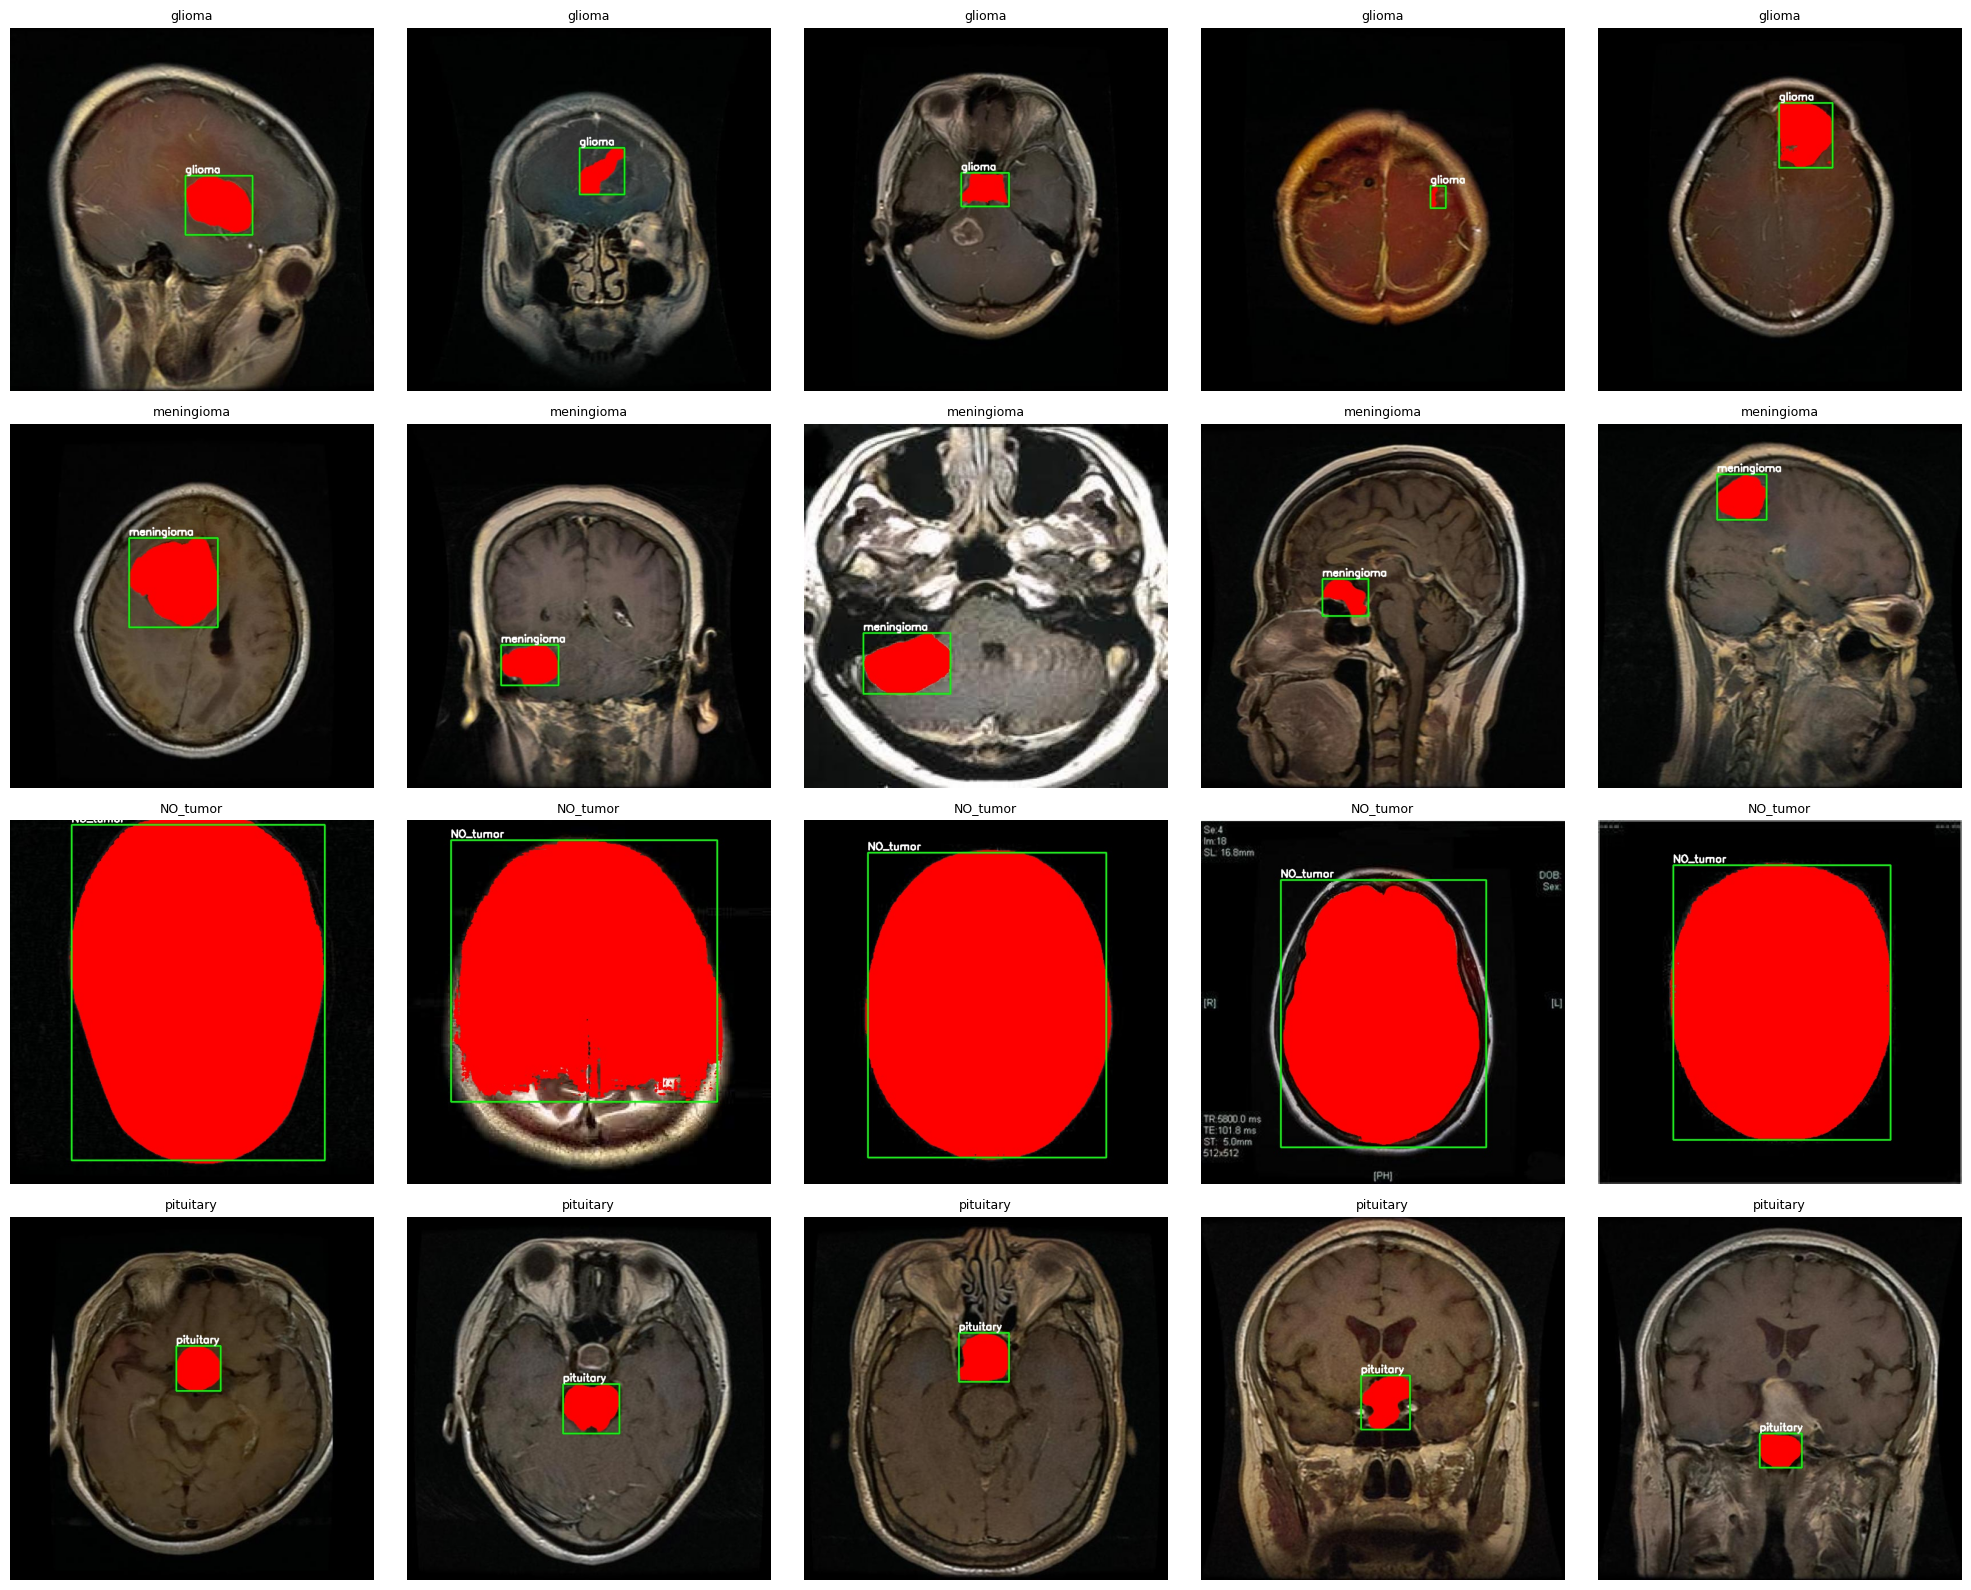

In [37]:
import os
import cv2
import json
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Paths
output_dir = "/content/sam_segmented_results"
json_path = "/content/yolo_bboxes_with_labels.json"

# Load annotations
with open(json_path, 'r') as f:
    annotations = json.load(f)

# Group image names by label
label_to_images = defaultdict(set)
for ann in annotations:
    label = ann["label"]
    label_to_images[label].add(ann["image"])  # store unique images per label

# Get 5 random images per class
selected_images = []
for label, images in label_to_images.items():
    images = list(images)
    random.shuffle(images)
    selected = images[:5]  # take up to 5 images
    selected_images.extend([(img, label) for img in selected])

# Grid setup
total = len(selected_images)
cols = 5
rows = (total + cols - 1) // cols

plt.figure(figsize=(4 * cols, 4 * rows))

# Show each image with label as title
for i, (image_name, label) in enumerate(selected_images):
    img_path = os.path.join(output_dir, image_name)
    if not os.path.exists(img_path):
        continue

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(label, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()
